In [3]:
#实践训练

In [7]:
#实践1：
#导入相关库
from pyecharts import options as opts
from pyecharts.charts import Scatter, Page
from pyecharts.globals import SymbolType
import pymysql

#连接MySQL数据库
conn = pymysql.connect(host='127.0.0.1',port=3306,user='root',password='root',db='sales',charset='utf8')
cur = conn.cursor()
sql_num = "SELECT trade_date,amount FROM stocks where trade_date>='2020-01-01'order by trade_date asc"
cur.execute(sql_num)
sh = cur.fetchall()
v1 = []
v2 = []
for s in sh:
    v1.append(s[0])
    v2.append(s[1])

def scatter_splitline() -> Scatter:
    c = (
        Scatter()
        .add_xaxis(v1)
        .add_yaxis("成交金额", v2,label_opts=opts.LabelOpts(is_show=False))
        .set_global_opts(
            title_opts=opts.TitleOpts(title="2020年企业股票成交金额分析", subtitle="成交金额（万元）"),
            xaxis_opts=opts.AxisOpts(splitline_opts=opts.SplitLineOpts(is_show=True)),
            yaxis_opts=opts.AxisOpts(type_="value",max_=60000,axistick_opts=opts.AxisTickOpts(is_show=True),splitline_opts=opts.SplitLineOpts(is_show=True)),
            toolbox_opts=opts.ToolboxOpts(),
            #legend_opts=opts.LegendOpts(is_show=True)
        )
    )
    return c

#第一次渲染时候调用load_javasrcript文件
scatter_splitline().load_javascript()
#展示数据可视化图表
scatter_splitline().render_notebook()

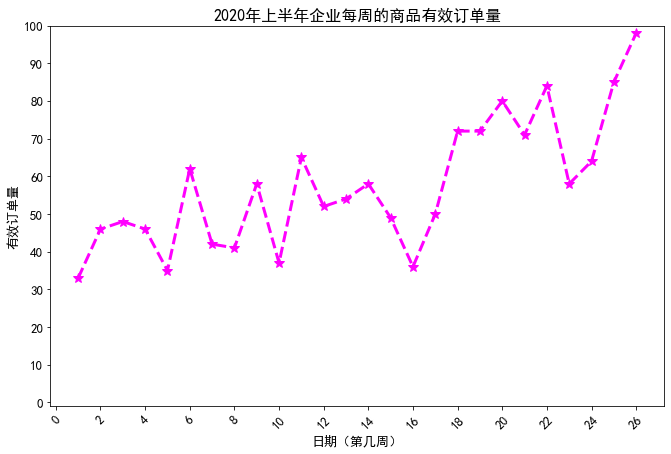

In [5]:
#实践2：
#导入相关库
import matplotlib.pyplot as plt
import numpy as np
import pymysql
plt.rcParams['font.sans-serif'] = ['SimHei']   #显示中文
plt.rcParams['axes.unicode_minus']=False       #正常显示负号

#连接MySQL数据库
conn = pymysql.connect(host='127.0.0.1',port=3306,user='root',password='root',db='sales',charset='utf8')
cursor = conn.cursor()
sql_num = "SELECT weekofyear(order_date),count(order_id) FROM orders WHERE dt=2020 and 'return'=0 and weekofyear(order_date)<=26 GROUP BY weekofyear(order_date)"
cursor.execute(sql_num)
sh = cursor.fetchall()
v1 = []
v2 = []
for s in sh:
    v1.append(s[0])
    v2.append(s[1])

#画折线图
plt.figure(figsize=(11,7))
plt.plot(v1, v2,marker='*',color='magenta',linewidth=3.0,linestyle='--',markersize=10)
#设置纵坐标范围
plt.ylim((-1,100))
#设置横坐标角度，这里设置为45度
plt.xticks(np.arange(0, 27, 2),rotation=45,fontsize=13)
plt.yticks(np.arange(0, 101, 10),fontsize=13)
#设置横纵坐标名称
plt.xlabel("日期（第几周）",fontsize=13)
plt.ylabel("有效订单量",fontsize=13)
#设置折线图名称
plt.title("2020年上半年企业每周的商品有效订单量",fontsize=16)
plt.show()

In [6]:
#实践3：
#声明Notebook类型，必须在引入pyecharts.charts等模块前声明
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB

from pyecharts import options as opts
from pyecharts.charts import Page, ThemeRiver
import pymysql

#连接MySQL数据库
conn = pymysql.connect(host='127.0.0.1',port=3306,user='root',password='root',db='sales',charset='utf8')
sql_num = "SELECT order_date,ROUND(SUM(sales),2),pay_method FROM orders WHERE order_date>='2020-06-01' and order_date<='2020-06-30' GROUP BY pay_method,order_date"
cursor = conn.cursor()
cursor.execute(sql_num)
sh = cursor.fetchall() 
v1 = []
v2 = []
for s in sh:
  v1.append([s[0],s[1],s[2]])
   
#绘制主题河流图
def themeriver() -> ThemeRiver:
    c = (
        ThemeRiver()
        .add(
            ["支付宝","微信","信用卡","其它"],
            v1,
            singleaxis_opts=opts.SingleAxisOpts(type_="time", pos_bottom="10%"),
        )
        .set_global_opts(title_opts=opts.TitleOpts(title="2020年6月份不同支付方式下的商品销售额", subtitle="2020年6月份企业运营分析"),
                         toolbox_opts=opts.ToolboxOpts(is_show=True),
                         legend_opts=opts.LegendOpts(is_show=True,pos_right='230')
                        )
        .set_series_opts(label_opts=True)
    )
    return c

#第一次渲染时候调用load_javasrcript文件
themeriver().load_javascript()
#展示数据可视化图表
themeriver().render_notebook()